## Import Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

## Multivariate LR

In [3]:
df = pd.read_csv('MultipleLR.csv', header=None)
x = df.to_numpy()
y = x[:, [-1]]
# since we have bias then 
x = np.block([np.ones((x.shape[0],1)), x[:,0:-1]])
print("shape of x is ", x.shape)
print("shape of y is ", y.shape)

shape of x is  (25, 4)
shape of y is  (25, 1)


# `Vectorized form for Multivariate Functions`

In [2]:
def initialization(x):
    costs, err_ls = [], []
    n = x.shape[1]
    theta, v, m = np.zeros((n, 1)), np.zeros((n, 1)), np.zeros((n, 1))
    return n, theta, costs, err_ls, v, m
    
def h(x, theta) : 
    y_pred = x @ theta
    return y_pred

def J(n, e):
    loss = (1/(2* n))*(e.T @ e)[0][0]
    return loss

def calc_gradient(n, x, e):
    D_theta = x.T @ e * (1/n)
    return D_theta 

def thetaVSloss(thetas_ls, costs):
    thetas_ls = np.squeeze(thetas_ls)
    n, m = thetas_ls.shape
    fig, a =  plt.subplots(1, m, figsize=(20, 5))
    for i, th in enumerate(thetas_ls.T):
        a[i].plot(th, costs)
        a[i].scatter(th, costs, marker='o', color='orange')
        a[i].set(xlabel=f"theta{i+1}", ylabel='cost')
    print(n, m)



# ADAGRAD + MINI-Batch

In [4]:
def create_mini_batches(X, y, batch_size):
    mini_batches = []
    data = np.hstack((X, y))
    # np.random.shuffle(data)
    n_minibatches = data.shape[0] // batch_size
    for i in range(n_minibatches+1):
        mini_batch = data[i * batch_size:(i + 1)*batch_size, :]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_mini, Y_mini))
    if data.shape[0] % batch_size != 0:
        mini_batch = data[i * batch_size:data.shape[0]]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_mini, Y_mini))
    return mini_batches

In [5]:
def adagrad_mini_batch (x, y, alpha, max_it, beta1, beta2, epsilon, batch_size):
    mini_batches = create_mini_batches(x, y, batch_size)
    n, theta, costs, thetas_ls, v, m = initialization(x)
    for i in range(max_it):
        for mini_batch in mini_batches:
            x_mini, y_mini = mini_batch
            
            #hypothisis
            y_pred = h(x_mini, theta)
            #calc cost
            err = y_pred - y_mini
            loss = J(batch_size, err)
            #calc gradient
            D_theta = calc_gradient(batch_size, x_mini, err)
            #update gradient
            v = v + (D_theta ** 2)
            theta = theta - ((alpha * D_theta) / np.sqrt(v + epsilon))
        
        thetas_ls.append(theta)  
        err = h(x_mini, theta) - y_mini
        epoch_loss = J(len(err),err)
        costs.append(epoch_loss)   
        
        # if abs(epoch_loss - costs[i-1]) < 1. and i!=0:
        #     break
        # elif np.linalg.norm(D_theta) < 1.:
        #     break
    return costs, thetas_ls, theta


In [6]:
costs, thetas_ls, theta = adagrad_mini_batch (x, y, alpha = 0.08, max_it = 100, beta1 = 0.9, beta2 = 0.999 , epsilon = 10e-8, batch_size = 16)
y_pred = h(x, theta)
print("R2score =", r2_score(y, y_pred))
# len(costs)

R2score = 0.9782182402058045


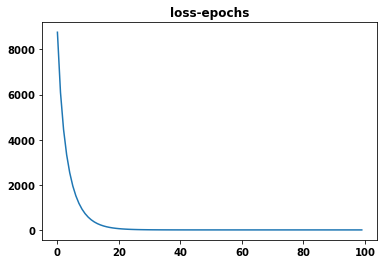

In [7]:
plt.plot(costs)
plt.title("loss-epochs")
plt.show()

100 4


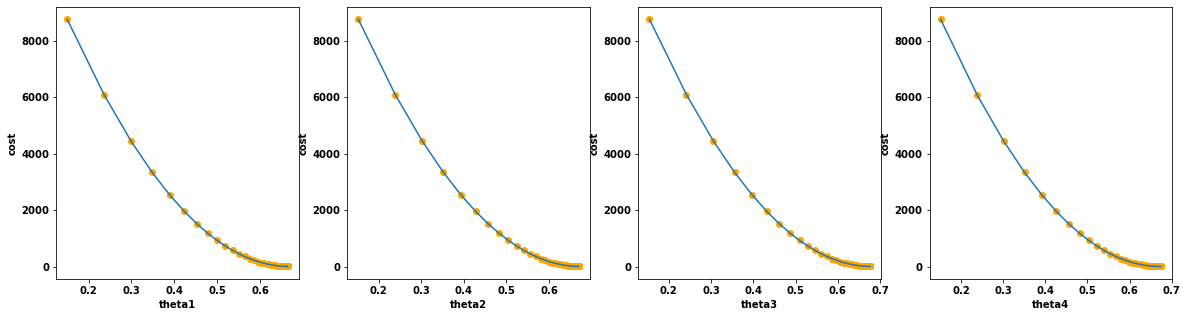

In [8]:
thetaVSloss(thetas_ls, costs)